< [Data Mining](../ica03/Data_Mining.ipynb) | Contents (TODO) | [Supervised Learning](../ica05/Supervised_Learning.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/Data_Mining.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Data Preprocessing and Visualization

In today's exercise, we are going to talk about how to preprocess data into a form that is useful for you(r machine learning model). We will also talk about how to visualize the data set so that you get a good grasp of how your data look like, which is tremendously important, even more than the actual machine learning part itself, but often overlooked. In this example, we are going to take a look at [Student Alcohol Consumption data set](https://www.kaggle.com/uciml/student-alcohol-consumption) available in Kaggle. For your convenience, however, you don't need to download the data set, but I have already included the data set with this example. Feel free to go ahead and look up `data` folder within the same directory where this notebook exists (or [here](https://github.com/stephenbaek/bigdata/tree/master/in-class-assignments/ica04/data) if you're accessing this notebook from Colab).

In [1]:
import pandas as pd

# some CSV files are not separated with comma, but weirdly with some other symbols, such as semicolon ';' in this case...
df = pd.read_csv('https://github.com/stephenbaek/bigdata/raw/master/in-class-assignments/ica04/data/student-mat.csv', sep=';')

# In case you have too many columns, pandas automatically skips to display some of the columns in the middle.
# We will disable this option for this exercise.
pd.set_option('display.max_columns', None) 

df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## 1. Preprocessing

### 1.1. Sampling

When you have a data set with millions of entries, the shear volume of data can be overwhelming and you might be hindered to see inside of the data set and develop some insights. To this end, it is always a good practice to sample the data set and create a smaller data set with handful amount of subsamples.

In Pandas, subsampling a data set can be as simple as `df.sample()` as shown below. The function draws random subsamples from the DataFrame.

In [2]:
sampled = df.sample(n=10)
sampled

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
104,GP,M,15,U,GT3,A,3,4,services,other,course,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,4,1,1,1,0,16,18,18
129,GP,M,16,R,GT3,T,4,4,teacher,teacher,course,mother,1,1,0,no,no,yes,yes,yes,yes,yes,no,3,5,5,2,5,4,8,18,18,18
99,GP,F,16,U,GT3,T,4,3,other,at_home,course,mother,1,3,0,yes,yes,yes,no,yes,yes,yes,no,5,3,5,1,1,3,0,7,9,8
264,GP,F,18,U,GT3,T,2,2,at_home,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,4,3,3,1,1,3,0,9,10,0
133,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,1,1,4,5,16,12,11,11
141,GP,M,16,U,LE3,T,2,2,services,services,reputation,father,2,1,2,no,yes,no,yes,yes,yes,yes,no,2,3,3,2,2,2,8,9,9,9
160,GP,M,17,R,LE3,T,2,1,at_home,other,course,mother,2,1,2,no,no,no,yes,yes,no,yes,yes,3,3,2,2,2,5,0,7,6,0
50,GP,F,16,U,LE3,T,2,2,services,services,course,mother,3,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,2,3,4,2,12,13,13
203,GP,F,17,R,GT3,T,2,2,other,other,reputation,mother,1,1,0,no,yes,no,no,yes,yes,yes,no,5,3,2,1,2,3,18,7,6,6
180,GP,M,16,U,GT3,T,4,3,teacher,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,3,4,3,2,3,3,10,9,8,8


Or, alternatively, you can use the argument `frac` to define the fraction (percentage) of the original data you would like to sample. For example, to sample 2% of the original data points, you can call something like this:

In [3]:
sampled2 = df.sample(frac=0.02)
sampled2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
129,GP,M,16,R,GT3,T,4,4,teacher,teacher,course,mother,1,1,0,no,no,yes,yes,yes,yes,yes,no,3,5,5,2,5,4,8,18,18,18
121,GP,M,15,U,GT3,T,2,2,services,services,home,father,1,4,0,no,yes,yes,yes,yes,yes,yes,no,5,5,4,1,2,5,6,16,14,15
79,GP,F,16,U,GT3,T,3,4,at_home,other,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,2,4,3,1,2,3,12,5,5,5
20,GP,M,15,U,GT3,T,4,3,teacher,other,reputation,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,1,1,1,1,0,13,14,15
309,GP,F,19,U,LE3,T,1,1,at_home,other,reputation,other,1,2,1,yes,yes,no,yes,no,yes,yes,no,4,4,3,1,3,3,18,12,10,10
95,GP,F,15,R,GT3,T,1,1,at_home,other,home,mother,2,4,1,yes,yes,yes,yes,yes,yes,yes,no,3,1,2,1,1,1,2,7,10,10
201,GP,F,16,U,GT3,T,2,3,other,other,reputation,mother,1,2,0,yes,yes,yes,yes,yes,yes,no,no,4,4,3,1,3,4,6,8,10,10
300,GP,F,18,U,LE3,A,4,4,health,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,yes,4,2,4,1,1,4,14,12,10,11


Note that the options `n` and `frac` CANNOT be used together.

### 1.2. Mapping

One thing you perhaps might have noticed is that some of the columns are in non-numeric format. For exampe, `sex` is in either `F` or `M`, `famsize` (family size) is either `GT3` or `LE3`, `guardian` is either `mother`, `father`, or `other`, so on and so forth.

In [4]:
print(df.sex.unique())
print(df.famsize.unique())
print(df.guardian.unique())

['F' 'M']
['GT3' 'LE3']
['mother' 'father' 'other']


This can actually be problematic later, because, eventually your machine learning model (which is basically some "kinda sorta" math formula) would expect to see numeric values, not strings or texts. Thus, what we want to do over here is to convert them into numeric values. For example, we could use a binary variable to indicate if the student is female (1) or not (0). We could use the same strategy for the family size by denoting `1` for a large family (`GT3`) and `0` for a small family (`LE3`).

In [5]:
df = df.replace({                     # Don't run this line twice
    'sex': {'F': 1, 'M': 0},          #
    'famsize': {'GT3': 1, 'LE3': 0}   #
                })                    #
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,1,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,0,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,1,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,1,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In the above, notice the use and the structuring of the curly braces. That is, `DataFrame.replace()` function expects the "mapping rules" to be defined as dictionaries. The outer curly braces simply list the columns that are being mapped, while the inner curly braces specifies the conversion rule. Please pause and ponder to make sure the syntax makes sense to you.

Here, you might wonder, however, how to numerize the `guardian` column. For `sex` and `famsize` there was a quite intuitive and trivial way of assigning binary digits. However, for the `guardian` column, there are now three different types of vaues in concern, namely `mother`, `father`, and `other`, which is not binary anymore.

One may argue that we can still solve this issue by assigning some integer numbers. For instanace, `mother = 1`, `father = 2`, and `other = 3`, or some similar sort. However, you have to be very careful when you assign those numbers as the numbers have "magnitude" and the magnitude actually means a lot in most of the machine learning models. For example, with the above example, your machine learning model would perceive having other guardian than mother or father is more "significant", which might bias your model. Furthermore, quantitativey, the "significance" of having other guardian is 3x times larger than having mother as guardian and 1.5x higher than having father as guardian, which doesn't even make sense at all. Situations like this is called *categorical variables*, where ordering between categories doesn't really make any sense.

For categorical variables, we convert them into something called *dummy variables* or *indicator variables* (some people recently started to call them *one-hot-encoding*, which in my view is an unnecessary reinvention of a term). Construction of dummy variables is actually quite simple. First, count how many total categories your variable can have. In our case, `guardian` can have total three different categories. Second, construct a "zero-vector" of the dimension equal to the total number of categories. Again, `guardian` variable should have `[0, 0, 0]`. Lastly, flag an element with `1` depending on the category. For example, if a student has `mother` as `guardian`, the vector value should now turn into `[1, 0, 0]`, for `father`, `[0, 1, 0]`, and for `other`, `[0, 0, 1]`. In this way, you can effectively convert categorical variables into numeric values without posing any bias.

(*Sometimes, people use one less elements in the dummy variable than the total number of categories, to remove the redundancy. In this case, the cateogry that is not explicitly encoded is called the "reference". For example, we can use `mother` as reference and set `[1, 0]` for `father` and `[0, 1]` for `other`.)

In pandas, converting to dummy variables is as simple as `DataFrame.get_dummies`.

In [6]:
df = pd.get_dummies(df, columns=["guardian"]) # can actually list multiple columns if necessary
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,1,0
1,GP,1,17,U,1,T,1,1,at_home,other,course,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,0,0
2,GP,1,15,U,0,T,1,1,at_home,other,other,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,0,1,0
3,GP,1,15,U,1,T,4,2,health,services,home,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,1,0
4,GP,1,16,U,1,T,3,3,other,other,home,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1,0,0


#### Discussion (Group Assignment)

- List all the other columns that needs to be converted to numeric values
- For each of the values you listed above, what are the binary variables and what are the categorical variables?
- Write a code below to map the given data set to a numeric table.


### 1.3. Discretization
Sometimes, your data is too granular that you might be hindered from seeing the big trend. Also, when the data is noisy, high-resolution measurement of a quantity is not always a desirable thing. No matter what the reason is, one useful trick to analyze a large data is to discretize (quantize) the values. For example, let us take a look at the absences data.

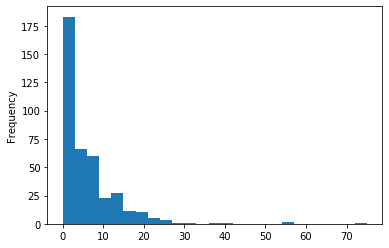

In [11]:
df.absences.plot(kind='hist', bins=25)

In [12]:
df.absences.describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

First, we can notice that many of the students have zero absences. Then, another big majority of students have absence values less than or equal to 5. Some students are between 5 and 15, and there are also some extreme cases where the total number absences is way beyond 15. From this observation, one potential discretization of data is as follows:

In [34]:
absences_discretized = pd.cut(df.absences, [0, 1, 5, 15, float("inf")], labels=[0, 1, 2, 3], right=False)
print(absences_discretized)

0      2
1      1
2      2
3      1
4      1
      ..
390    2
391    1
392    1
393    0
394    2
Name: absences, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


Note that `pd.cut` accepts a Pandas `Series` object and outputs a discretized `Series` object. The second argument (input) to `pd.cut` is the list of intervals or the bins. In our case, we would like to have [0, 1), [1, 5), [5, 15), and [15, inf) as our bins, representing 'no absence at all', 'only a few absences', 'some absences', and 'many absences', respectively, so the bins become `[0, 1, 5, 15, float("inf")]`. Notice the weird way of denoting the infinity in Python. Also, `right=False` at the end of the `pd.cut` arguments indicates that the intervals (bins) will not include the right limits. If it is turned `True`, which is the default setting, the intervals will become (0, 1], (1, 5], (5, 15], and (15, inf], instead (notice the parentheses and square brackets).

Meanwhile, in `pd.cut`, we can specify the label for each bin. In this example, we use `0, 1, 2, 3` as labels for those bins, respectively, the numbers indicating the "severity of absences". Technically, the bins are considered as categorical variables. However, in our case, the "categories" actually have some ordering (i.e. there exists the notion of magnitude), as opposed to the examples above. In this case, the variables are called *ordinal variables*.

Given this, we replace the `absences` column with the new discretized column:

In [37]:
df['absences_discretized'] = absences_discretized   # add the new discretized column
df = df.drop(columns='absences')    # the original 'absences' column can be removed from table
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,guardian_father,guardian_mother,guardian_other,absences_discretized
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,5,6,6,0,1,0,2
1,GP,1,17,U,1,T,1,1,at_home,other,course,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,5,5,6,1,0,0,1
2,GP,1,15,U,0,T,1,1,at_home,other,other,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,7,8,10,0,1,0,2
3,GP,1,15,U,1,T,4,2,health,services,home,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,15,14,15,0,1,0,1
4,GP,1,16,U,1,T,3,3,other,other,home,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,6,10,10,1,0,0,1


#### Discussion (Group Assignment)

- Other than `absences`, what else can be discretized?
- Can you find two or more columns that can be merged and discretized together? Please justify.

### 1.4. Aggregation

One of the important outcome metrics in the table are the grades (`G1`, `G2`, and `G3`). In the data set, the student performance was tracked over a period of time, such that `G1`, `G2`, and `G3` capture the change of student performance over time. However, in some cases, this might just create a confusion and you may just want to merge them into a single value for some reason. In such cases, we can *aggregate* the columns by averaging them.

Note the term *data aggregation* is often used for a lot more chaotic size of the values than just three in our case. But this example is intended to get you a feel for how data aggregation is done in Pandas. Hence, we won't bother to make the example more realistic. This being said, let us simply try to aggregate the three columns by taking the average of them.

In [46]:
G_agg = df[ ['G1', 'G2', 'G3'] ].agg('mean', axis='columns')
print(G_agg)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64


In [48]:
df['G_agg'] = G_agg
df = df.drop(columns=['G1', 'G2', 'G3'])
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,guardian_father,guardian_mother,guardian_other,absences_discretized,G_agg
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,0,1,0,2,5.666667
1,GP,1,17,U,1,T,1,1,at_home,other,course,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,1,0,0,1,5.333333
2,GP,1,15,U,0,T,1,1,at_home,other,other,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,0,1,0,2,8.333333
3,GP,1,15,U,1,T,4,2,health,services,home,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,1,0,1,14.666667
4,GP,1,16,U,1,T,3,3,other,other,home,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,1,0,0,1,8.666667


You can also think of a slightly different scenario for aggregation, where instead of aggregating the columns, you would like to aggregate the rows by grouping them according to some criteria. For example, 

### CAUTION: Before to move on to the next section, make sure you don't have `string` variables any more.
All of the values in the table has to be numeric, in order to run the examples in the next section. If you have done the above assignments, you would be okay by now. However, in case you still have `string` variables in your table but just want to move on for now, you can drop those cells like in below:

In [ ]:
df = df.drop(columns=['school', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
                      'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

## 2. Visualization

### 2.1. Dimension Reduction

In [31]:
import numpy as np
cov = data.cov().values
[eigval, pc] = np.linalg.eig(cov)
eigval = np.real(eigval)
pc = np.real(pc)
X0 = data.values
X = (X0 - np.mean(X0, axis=0))
F = np.dot(X, pc)
F = pd.DataFrame(F[:, :2], columns=['PC1', 'PC2'])
F

TypeError: unsupported operand type(s) for /: 'str' and 'int'

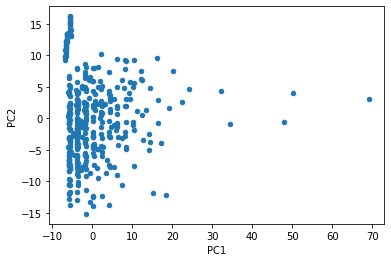

In [22]:
F.plot(kind='scatter', x='PC1', y='PC2')

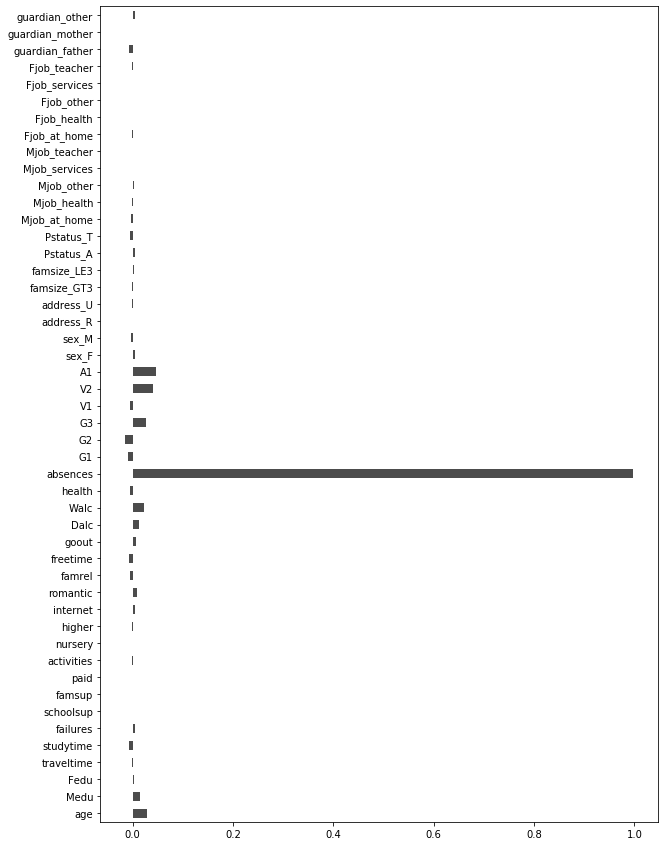

In [23]:
attrib = list(data)         # get attribute names
pcdata  = pd.Series(pc[:,0], index=attrib)
pcdata.plot(kind='barh',color='k',alpha=0.7, figsize=(10,15))

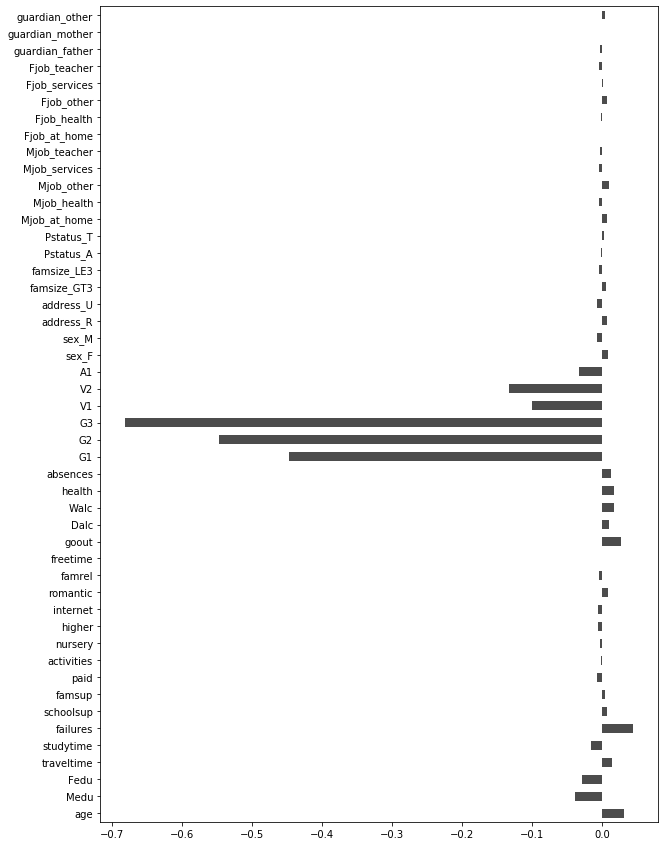

In [24]:
pcdata  = pd.Series(pc[:,1], index=attrib)
pcdata.plot(kind='barh',color='k',alpha=0.7, figsize=(10,15))

In [26]:
!pip install -U scikit-learn

In [28]:
from sklearn.manifold import MDS, TSNE

In [35]:
embedding_mds = MDS(n_components=2)
projected_mds = embedding_mds.fit_transform(X)

In [36]:
projected_mds = pd.DataFrame(projected_mds, columns=['MDS1', 'MDS2'])
projected_mds.head(5)

,MDS1,MDS2
0,-9.030011,2.139477
1,-9.791736,0.313603
2,-3.980220,6.445892
3,8.315918,-4.127009
4,-5.142495,-3.965339
5,8.869713,3.966248
6,1.420420,-6.503605
7,-9.452025,3.126889
8,13.246700,-7.623415
9,7.239074,-8.042583


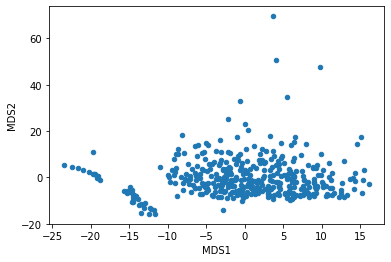

In [37]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2')

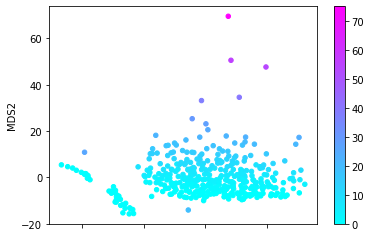

In [108]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=data.absences, colormap='cool')

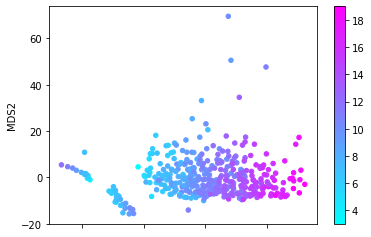

In [109]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=data.G1, colormap='cool')

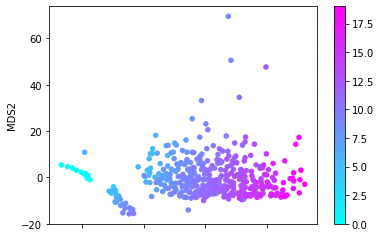

In [110]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=data.G2, colormap='cool')

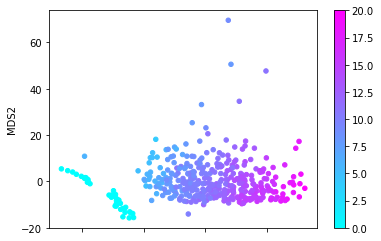

In [111]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=data.G3, colormap='cool')

In [45]:
embedding_tsne = TSNE(n_components=2)
projected_tsne = embedding_tsne.fit_transform(X)

In [46]:
projected_tsne = pd.DataFrame(projected_tsne, columns=['TSNE1', 'TSNE2'])
projected_tsne.head(5)

,TSNE1,TSNE2
0,7.382785,10.653516
1,8.328942,8.774145
2,-1.455576,8.784307
3,-5.985924,-15.019314
4,14.126385,-3.678679


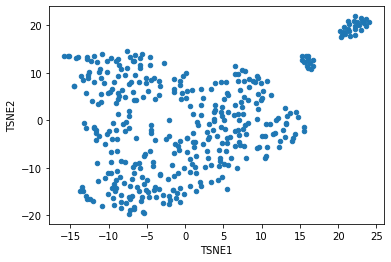

In [54]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2')

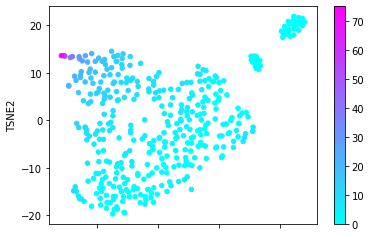

In [81]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=data.absences, colormap='cool')

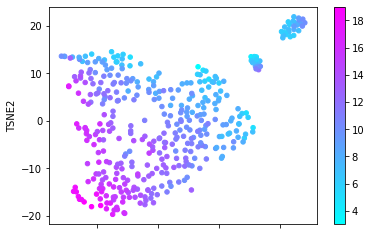

In [82]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=data.G1, colormap='cool')

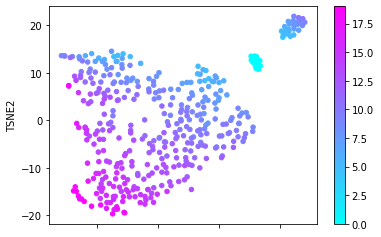

In [83]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=data.G2, colormap='cool')

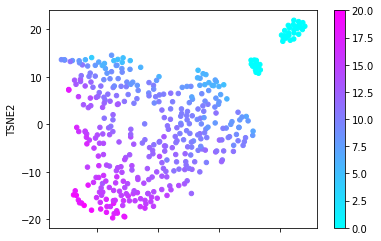

In [84]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=data.G3, colormap='cool')

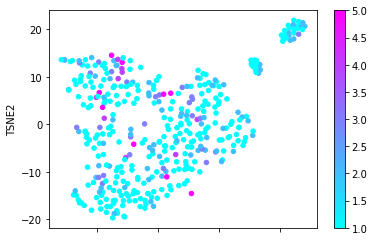

In [107]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=data.Dalc, colormap='cool')

< [Data Mining](../ica03/Data_Mining.ipynb) | Contents (TODO) | [Supervised Learning](../ica05/Supervised_Learning.ipynb) >

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica03/Data_Mining.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>